In [137]:
import os
import json
import pandas as pd

Které knihy jsou ve srovnání: česká fikce a non-fikce vydaná v letech 2023 a 2024, u které se podařilo načíst ISBN z Martinus.cz a prostřednictvím tohoto ISBN stáhnout data z Goodreads a Dadatabáze knih.

## Goodreads

In [138]:
gr = pd.read_csv(os.path.join("data","goodreads-hodnoceni.csv"))

In [139]:
gr.columns

Index(['GR_isbn', 'GR_date', 'GR_title', 'GR_rating', 'GR_ratings_count',
       'GR_reviews', 'GR_published'],
      dtype='object')

In [140]:
gr = gr.sort_values(by='GR_date')

In [141]:
gr['GR_date'].max()

'2024-09-02 03:54:13'

### Nejlépe hodnocené knihy vůbec

In [142]:
gr[gr['GR_ratings_count'] >= 100].groupby('GR_title')['GR_rating'].last().nlargest(30)

GR_title
U severní zdi by Petra Klabouchová                                                     4.72
Šikmý kostel 3: románová kronika ztraceného města, léta 1945–1961 by Karin Lednická    4.71
V pasti pohlaví by Silvie Lauder                                                       4.61
Stačí mávnout křídly (Stačí mávnout křídly, #1) by Sára Topinková                      4.49
Budoucnost nepráce by Filip Dřímalka                                                   4.44
Severka by Nina Špitálníková                                                           4.44
Lásky čas by Adéla Rosípalová                                                          4.43
Rozložíš paměť by Marek Torčík                                                         4.38
Zvonkohra by Eliška Václavíková                                                        4.38
Nebuď p*ča aneb jak (ne)pracovat s dětmi by Tomáš Morávek                              4.31
Srpny by Jakub Stanjura                                                

### Nejvíce hodnocení

In [143]:
gr.groupby("GR_title")['GR_ratings_count'].max().nlargest(30)

GR_title
Srpny by Jakub Stanjura                                                                     1297.0
Severka by Nina Špitálníková                                                                1015.0
Těla by Klára Vlasáková                                                                      940.0
Rozložíš paměť by Marek Torčík                                                               793.0
Kde jsi, když nejsi by Radka Třeštíková                                                      621.0
Jsme nevyhnutelní (Navždycky #4) by Nofreeusernames                                          574.0
Gazely by Patrik Hartl                                                                       514.0
Fosilie by Michal Kašpárek                                                                   506.0
Šikmý kostel 3: románová kronika ztraceného města, léta 1945–1961 by Karin Lednická          475.0
U severní zdi by Petra Klabouchová                                                           447.0
L

### Nejvíce nových hodnocení od dubna '24

In [144]:
pd.Series(gr.groupby("GR_title")['GR_ratings_count'].max() - gr.groupby("GR_title")['GR_ratings_count'].min()).nlargest(25)

GR_title
Rozložíš paměť by Marek Torčík                                                         492.0
Šikmý kostel 3: románová kronika ztraceného města, léta 1945–1961 by Karin Lednická    422.0
Severka by Nina Špitálníková                                                           400.0
Srpny by Jakub Stanjura                                                                361.0
Odvaha by Markéta Lukášková                                                            248.0
Těla by Klára Vlasáková                                                                216.0
Fosilie by Michal Kašpárek                                                             188.0
Lásky čas by Adéla Rosípalová                                                          178.0
Gazely by Patrik Hartl                                                                 176.0
U severní zdi by Petra Klabouchová                                                     135.0
V pasti pohlaví by Silvie Lauder                             

In [145]:
import datetime

In [146]:
two_weeks_ago = datetime.datetime.now() - datetime.timedelta(days=13)
two_weeks_ago = two_weeks_ago.strftime('%Y-%m-%d')

In [147]:
week_ago = datetime.datetime.now() - datetime.timedelta(days=6)
week_ago = week_ago.strftime('%Y-%m-%d')

In [148]:
month_ago = pd.to_datetime(gr['GR_date'].max()) - datetime.timedelta(days=29)
month_ago = month_ago.strftime('%Y-%m-%d')
month_ago

'2024-08-04'

In [149]:
gr_stare = gr[gr['GR_date'] < month_ago]['GR_title'].drop_duplicates().to_list()
gr_nove = gr[~gr['GR_title'].isin(gr_stare)]['GR_title'].drop_duplicates().to_list()
gr_nove

['Očima kriminalistů by Miroslav Vaňura',
 'Future ON! by Bob Kartous',
 'Malá magická katastrofa by Štěpán Bartoš',
 'Socipat by D. B. Peck',
 'Dva v šinkansenu by Marie Machytková',
 'Než zjistíš pravdu by Elena Minářová',
 'Krušnohorské osudy by Štěpán Javůrek',
 'Dokud nás krev nerozdělí by Petr Opršal',
 'Šedesát let v psychiatrii jako majitel klíčů by Radkin Honzák',
 'Mistr meče popravního by Magdaléna Paťhová',
 'MaminkOFF: Malovaly jsme si mateřství by Kateřina Chalupníková',
 'Baron Trenck: až na hranici pekel by František Niedl',
 'Když za nás Bůh netahá kaštany z ohně by Renata Kalenská',
 'Zmije v garáži by Magda Jogheeová',
 'Expanzní sektor (Centrální impérium: Omega, #2) by Jan Kotouč',
 'Silvuple by Ewald Murrer',
 'Minout se přesně by Petr Hruška',
 'Vynucených 7 dní by Lenka Hnátová',
 'Myšlenky zločince v české kotlině by Jiřina Hofmanová',
 'Krvavý Žižkov by Simona Bohatá',
 'Skutečné zločiny v Brně a okolí by Ivana Žáková',
 'Lež má krátké nohy by Karol Efraim Sid

### Nejvíce hodnocení za poslední měsíc

In [150]:
goodreads_mesic_ratings = pd.Series(gr.groupby("GR_title")['GR_ratings_count'].max() - gr[gr['GR_date'] > month_ago].groupby("GR_title")['GR_ratings_count'].min()).sort_values(ascending=False)
goodreads_mesic_ratings = goodreads_mesic_ratings[goodreads_mesic_ratings >= 10]
goodreads_mesic_ratings

GR_title
Rozložíš paměť by Marek Torčík                                                         86.0
Srpny by Jakub Stanjura                                                                82.0
Šikmý kostel 3: románová kronika ztraceného města, léta 1945–1961 by Karin Lednická    80.0
Severka by Nina Špitálníková                                                           66.0
Odvaha by Markéta Lukášková                                                            53.0
Fosilie by Michal Kašpárek                                                             47.0
Poslední léto by Dorota Ambrožová                                                      35.0
Gazely by Patrik Hartl                                                                 34.0
Lásky čas by Adéla Rosípalová                                                          26.0
Těla by Klára Vlasáková                                                                26.0
U severní zdi by Petra Klabouchová                                     

In [151]:
goodreads_mesic_novinky = pd.Series(gr[gr['GR_title'].isin(gr_nove)].groupby("GR_title")['GR_ratings_count'].max() - gr[(gr['GR_title'].isin(gr_nove)) & (gr['GR_date'] > month_ago)].groupby("GR_title")['GR_ratings_count'].min()).sort_values(ascending=False)
goodreads_mesic_novinky = goodreads_mesic_novinky[goodreads_mesic_novinky >= 3]
goodreads_mesic_novinky

GR_title
Dva v šinkansenu by Marie Machytková                              7.0
Vynucených 7 dní by Lenka Hnátová                                 5.0
Když za nás Bůh netahá kaštany z ohně by Renata Kalenská          5.0
Dokud nás krev nerozdělí by Petr Opršal                           4.0
MaminkOFF: Malovaly jsme si mateřství by Kateřina Chalupníková    4.0
Socipat by D. B. Peck                                             3.0
Minout se přesně by Petr Hruška                                   3.0
Name: GR_ratings_count, dtype: float64

In [152]:
gr[gr['GR_date'] > month_ago]['GR_date'].min()[0:10]

'2024-08-05'

In [153]:
gr['GR_date'].max()[0:10]

'2024-09-02'

### Nejvíce hodnocení v posledním týdnu a dvou

In [154]:
pd.Series(gr[gr['GR_date'] > two_weeks_ago].groupby("GR_title")['GR_ratings_count'].max() - gr[gr['GR_date'] < week_ago].groupby("GR_title")['GR_ratings_count'].max()).nlargest(25)

GR_title
Srpny by Jakub Stanjura                                                                21.0
Rozložíš paměť by Marek Torčík                                                         20.0
Severka by Nina Špitálníková                                                           16.0
Odvaha by Markéta Lukášková                                                            13.0
Šikmý kostel 3: románová kronika ztraceného města, léta 1945–1961 by Karin Lednická    13.0
Fosilie by Michal Kašpárek                                                             10.0
Poslední léto by Dorota Ambrožová                                                       9.0
Těla by Klára Vlasáková                                                                 9.0
Pláňata by Petra Dvořáková                                                              7.0
Letní bouřky by Klára Pospíšilová                                                       6.0
Pusťte světlo do tmavého večera by Jan Kholl                           

In [155]:
pd.Series(gr[gr['GR_date'] > two_weeks_ago].groupby("GR_title")['GR_ratings_count'].max() - gr[gr['GR_date'] < two_weeks_ago].groupby("GR_title")['GR_ratings_count'].max()).nlargest(25)

GR_title
Rozložíš paměť by Marek Torčík                                                         40.0
Srpny by Jakub Stanjura                                                                35.0
Šikmý kostel 3: románová kronika ztraceného města, léta 1945–1961 by Karin Lednická    35.0
Severka by Nina Špitálníková                                                           32.0
Odvaha by Markéta Lukášková                                                            22.0
Poslední léto by Dorota Ambrožová                                                      18.0
Gazely by Patrik Hartl                                                                 16.0
Těla by Klára Vlasáková                                                                16.0
Pusťte světlo do tmavého večera by Jan Kholl                                           15.0
Fosilie by Michal Kašpárek                                                             14.0
Letní bouřky by Klára Pospíšilová                                      

### Pokus s time series

In [156]:
vyvoj = gr[['GR_date','GR_title','GR_ratings_count']]
vyvoj['GR_date'] = pd.to_datetime(vyvoj['GR_date'])
vyvoj = vyvoj.sort_values(by='GR_date')
vyvoj = vyvoj.set_index('GR_date')

C:\Users\micha\AppData\Local\Temp\ipykernel_27244\1877337853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vyvoj['GR_date'] = pd.to_datetime(vyvoj['GR_date'])


<Axes: xlabel='GR_date'>

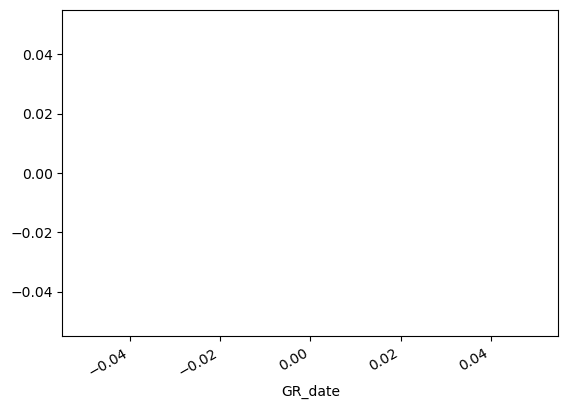

In [157]:
vyvoj[vyvoj['GR_title'].str.contains('Duše národa',na=False)]['GR_ratings_count'].plot()

<Axes: xlabel='GR_date'>

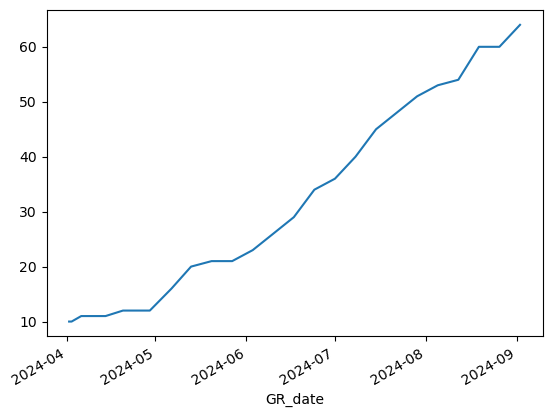

In [158]:
vyvoj[vyvoj['GR_title'].str.contains('Hella',na=False)]['GR_ratings_count'].plot()

### Další pokusy

In [159]:
gr['GR_date'] = pd.to_datetime(gr['GR_date'])

In [160]:
tydny = gr.groupby(pd.Grouper(key='GR_date', freq='W'))['GR_ratings_count'].sum()
tydny

GR_date
2024-04-07    36632.0
2024-04-14    24847.0
2024-04-21    12856.0
2024-04-28    12964.0
2024-05-05    13236.0
2024-05-12    13890.0
2024-05-19    14266.0
2024-05-26    14562.0
2024-06-02    14983.0
2024-06-09    15329.0
2024-06-16    15749.0
2024-06-23    16109.0
2024-06-30    16324.0
2024-07-07    16739.0
2024-07-14    17279.0
2024-07-21    18029.0
2024-07-28    18238.0
2024-08-04    18808.0
2024-08-11    19056.0
2024-08-18    19455.0
2024-08-25    20045.0
2024-09-01    20290.0
2024-09-08    20706.0
Freq: W-SUN, Name: GR_ratings_count, dtype: float64

In [161]:
monthly_sum = tydny.resample('M').sum()
monthly_sum

C:\Users\micha\AppData\Local\Temp\ipykernel_27244\2088204097.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sum = tydny.resample('M').sum()


GR_date
2024-04-30    87299.0
2024-05-31    55954.0
2024-06-30    78494.0
2024-07-31    70285.0
2024-08-31    77364.0
2024-09-30    40996.0
Freq: ME, Name: GR_ratings_count, dtype: float64

In [162]:
monthly_diff = monthly_sum.diff()
monthly_diff

GR_date
2024-04-30        NaN
2024-05-31   -31345.0
2024-06-30    22540.0
2024-07-31    -8209.0
2024-08-31     7079.0
2024-09-30   -36368.0
Freq: ME, Name: GR_ratings_count, dtype: float64

In [258]:
gr

,GR_isbn,GR_date,GR_title,GR_rating,GR_ratings_count,GR_reviews,GR_published,autorstvo,isbn
0,9.788024e+12,2024-04-01 14:11:25,Sochař by Artur Janoušek,2.00,2.0,1.0,"January 1, 2023",Artur Janoušek,9788024289472
1,9.788088e+12,2024-04-01 14:11:30,I smutek byl jen sen. Poezie Josefa Kocourka b...,4.00,1.0,0.0,"January 1, 2023",Josef Kocourek,9788088367291
2,9.788073e+12,2024-04-01 14:11:34,Hranice zvrhlosti by Jan Urban,3.29,14.0,3.0,"May 15, 2023",Jan Urban,9788072529704
3,9.788091e+12,2024-04-01 14:11:37,Z pera knihomolů: 11 povídek od českých a slov...,3.86,140.0,29.0,"March 31, 2023",Eliška Hronová,9788090837690
4,9.788076e+12,2024-04-01 14:11:43,"Stará béčková legenda (Stará béčková legenda, ...",4.21,19.0,6.0,"April 3, 2023",Shigor Birdman,9788075884374
...,...,...,...,...,...,...,...,...,...
15813,9.788025e+12,2024-09-02 03:54:03,Trnitá kletba by Anežka Kočová,4.07,75.0,18.0,"August 31, 2023",Anežka Kočová,9788025363850
15814,9.788072e+12,2024-09-02 03:54:06,Zuta a svlečena by Milan Ohnisko,4.00,5.0,0.0,"January 1, 2023",Milan Ohnisko,9788072278879
15815,9.788026e+12,2024-09-02 03:54:08,Pod Kaštanem by Barbora Majchráková,3.00,6.0,2.0,"June 15, 2023",Barbora Majchráková,9788025741528
15816,9.788028e+12,2024-09-02 03:54:10,V hrůze a krvi zrozeni by Kevin Wulfric Scherrer,3.46,13.0,1.0,"January 25, 2023",Kevin Wulfric Scherrer,9788027721405


In [295]:
prvni = gr.groupby('GR_title')['GR_date'].min()
prvni = prvni[prvni < '2024-04-22']
prvni = prvni.index.to_list()

In [296]:
pocitaci_zaklad = gr[~gr['GR_title'].isin(prvni)][['GR_date','GR_title','GR_rating','GR_ratings_count']].sort_values(by='GR_date')
pocitaci_zaklad

,GR_date,GR_title,GR_rating,GR_ratings_count
3372,2024-04-22 02:22:38,Domeček pro panenky by Ivan Wernisch,0.00,0.0
3663,2024-04-29 02:00:07,Boží potměšilost by Zdeněk Řehák,2.00,1.0
3785,2024-04-29 02:08:35,"Velice dlouhé schody (Ota Fink, #9) by Jarosla...",4.33,9.0
3893,2024-04-29 02:21:26,Starý paní mají v ústech porcelán by Monika Ti...,3.00,1.0
3909,2024-04-29 02:22:16,Domeček pro panenky by Ivan Wernisch,5.00,1.0
...,...,...,...,...
15788,2024-09-02 03:52:55,"Cesta dvou, Afrika by Tom Jurka",5.00,5.0
15797,2024-09-02 03:53:24,Jitřní záře by Dan Wlodarzcyk,3.00,1.0
15803,2024-09-02 03:53:38,Ještě jeden level by Ondřej Trhoň,4.43,21.0
15809,2024-09-02 03:53:54,…a přeskočila jiskra by Halina Pawlowská,0.00,0.0


In [313]:
pocitaci_zaklad['tydnu'] = pocitaci_zaklad.groupby('GR_title').cumcount() + 1

In [314]:
pocitaci_zaklad.sort_values(by="tydnu")

,GR_date,GR_title,GR_rating,GR_ratings_count,tydnu
3372,2024-04-22 02:22:38,Domeček pro panenky by Ivan Wernisch,0.00,0.0,1
11516,2024-07-22 03:31:08,"Komanda Omega (Centrální impérium: Omega, #1) ...",4.00,3.0,1
11520,2024-07-22 03:31:20,Svět v mé hlavě by Valentýna Coufalová,0.00,0.0,1
6726,2024-06-03 02:47:18,Cokoli píšu by Vladimir Vokolek,0.00,0.0,1
6732,2024-06-03 02:47:38,Řeka pod hladinou: vědomím proti času by Pavel...,0.00,0.0,1
...,...,...,...,...,...
15763,2024-09-02 03:51:35,"Velice dlouhé schody (Ota Fink, #9) by Jarosla...",4.36,14.0,19
15269,2024-09-02 02:58:03,Čemu a proč se smějeme? by Slavoj Titul,3.67,3.0,19
15164,2024-09-02 02:23:36,Psychologie pro každý den aneb Co nás ve škole...,0.00,0.0,19
15726,2024-09-02 03:49:19,Starý paní mají v ústech porcelán by Monika Ti...,3.00,2.0,19


<Axes: xlabel='tydnu'>

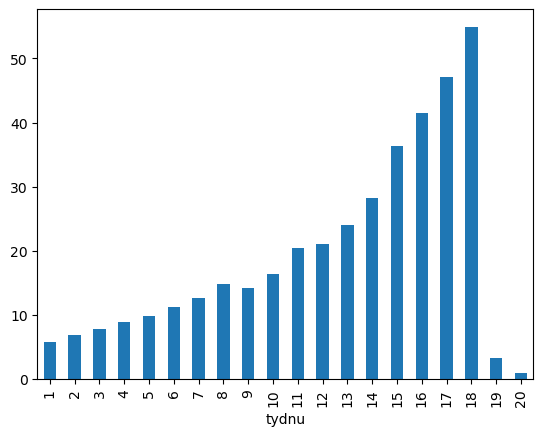

In [315]:
pocitaci_zaklad.groupby('tydnu')['GR_ratings_count'].mean().plot.bar()

<Axes: xlabel='tydnu'>

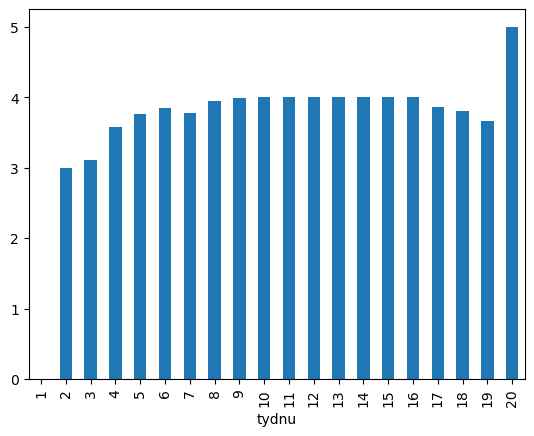

In [316]:
pocitaci_zaklad.groupby('tydnu')['GR_rating'].median().plot.bar()

In [276]:
import matplotlib.pyplot as plt


<Axes: title={'center': 'GR_ratings_count'}, xlabel='tydnu'>

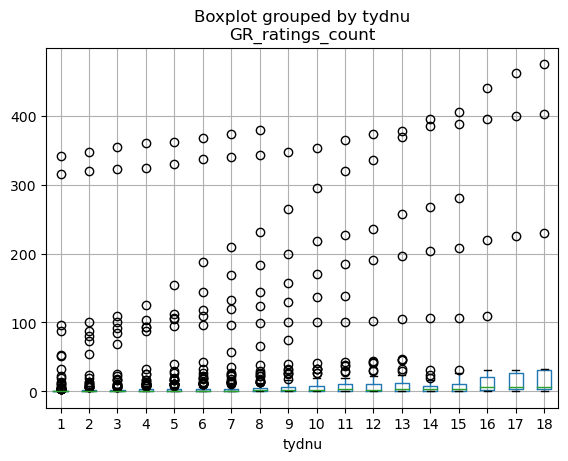

In [277]:
pocitaci_zaklad.boxplot(column='GR_ratings_count', by='tydnu')

## Databáze knih

In [282]:
dk = pd.read_csv(os.path.join("data","databazeknih-hodnoceni.csv"))

In [283]:
len(dk)

33384

In [284]:
len(dk.drop_duplicates())

33384

In [285]:
dk['DK_date'].max()

'2024-09-02 04:09:25'

In [286]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených'],
      dtype='object')

In [302]:
dk_nove = dk[dk['DK_date'] < '2024-04-22']['DK_titul'].drop_duplicates().to_list()
dk_nove = dk[~dk['DK_titul'].isin(dk_nove)]

In [303]:
pocitame_dk = dk_nove[['DK_titul','DK_date','DK_rating','DK_ratings_count','DK_Chystám_se_číst']]

In [304]:
pocitame_dk['tydnu'] = pocitame_dk.groupby('DK_titul').cumcount() + 1

C:\Users\micha\AppData\Local\Temp\ipykernel_27244\4289471237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pocitame_dk['tydnu'] = pocitame_dk.groupby('DK_titul').cumcount() + 1


<Axes: xlabel='tydnu'>

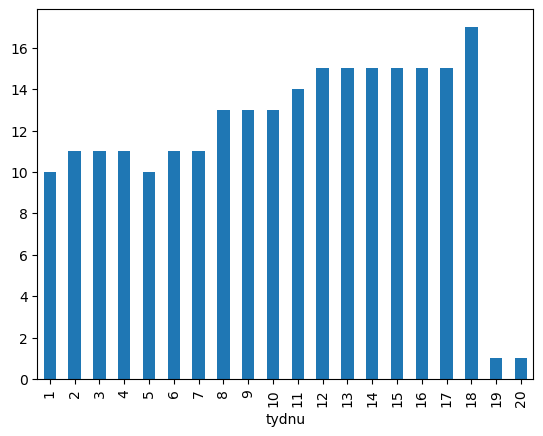

In [309]:
pocitame_dk.groupby('tydnu')['DK_Chystám_se_číst'].median().plot.bar()

<Axes: xlabel='tydnu'>

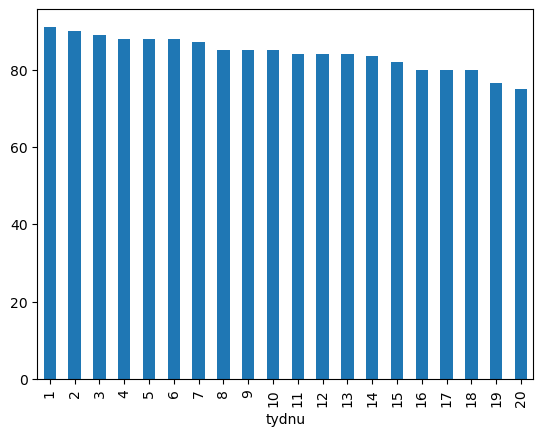

In [308]:
pocitame_dk.groupby('tydnu')['DK_rating'].median().plot.bar()

In [287]:
gr['autorstvo'] = gr['GR_title'].apply(lambda x: x.split(' by ')[1].strip())

In [288]:
gr['autorstvo']

0                Artur Janoušek
1                Josef Kocourek
2                    Jan  Urban
3                Eliška Hronová
4                Shigor Birdman
                  ...          
15813             Anežka Kočová
15814             Milan Ohnisko
15815       Barbora Majchráková
15816    Kevin Wulfric Scherrer
15817        Alena Mornštajnová
Name: autorstvo, Length: 15818, dtype: object

In [170]:
import numpy as np

In [171]:
df = pd.read_json(os.path.join("data","martinus_vyslo.json"))

In [172]:
df['isbn'] = df['M_isbn'].astype(str)
dk['isbn'] = dk['DK_isbn'].astype(str).apply(lambda x: x.replace(".0",""))

In [173]:
dk['skore'] = dk['DK_Chystám_se_číst'] + dk['DK_Přečtených']

In [174]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_tags', 'DK_Knihotéce',
       'DK_Chystám_se_číst', 'DK_Chci_si_koupit', 'DK_rating',
       'DK_ratings_count', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_dalších_seznamech', 'DK_Právě_čtených', 'DK_Doporučených', 'isbn',
       'skore'],
      dtype='object')

In [175]:
df.columns

Index(['M_titul', 'M_autorstvo', 'M_anotace', 'M_počet_stran', 'M_vazba',
       'M_rozměr', 'M_hmotnost', 'M_isbn', 'M_rok_vydání', 'M_jazyk',
       'M_původ', 'M_nakladatel', 'M_kategorizace', 'M_cena', 'M_datum',
       'M_série', 'M_díl', 'M_edice', 'M_pro_koho', 'M_e-kniha', 'M_přečtená',
       'M_věkové_doporučení', 'M_styl', 'M_ilustrace', 'M_účel_knihy',
       'M_audiokniha', 'M_vydání', 'M_originální_název', 'M_překlad',
       'M_ostatní', 'M_předběžné_datum_vydání', 'M_příloha',
       'M_jazyková_úroveň', 'M_knižní_předloha', 'isbn'],
      dtype='object')

### Nejvíce nových hodnocení od dubna '24

In [176]:
df['M_autorstvo']

0                     Tomáš Pospiszyl
1                       Eduardo Duran
2                                None
3        Alena Vančurová Hana Zídková
4                         Lukáš Bujna
                     ...             
11709                    Martin Odler
11710                    Jakub Klikar
11711               Dominika Prejdová
11712                   Martin Reiner
11713                Vladimír Paleček
Name: M_autorstvo, Length: 11654, dtype: object

In [177]:
def hezky_titul(row):
    try:
        autorstvo = df[df['isbn'] == row['isbn']]['M_autorstvo'].drop_duplicates().to_list()[0]
        return f"""{autorstvo}: {row['DK_titul']}"""
    except:
        return f"""?: {row['DK_titul']}"""

In [178]:
dk['hezky_titul'] = dk.apply(lambda row: hezky_titul(row), axis=1)

In [179]:
pd.Series(dk.groupby("hezky_titul")['DK_ratings_count'].max() - dk.groupby("hezky_titul")['DK_ratings_count'].min()).nlargest(20)

hezky_titul
Karin Lednická: Šikmý kostel 3                  489.0
Kristýna Trpková: Někdo z nás                   346.0
Patrik Hartl: Gazely                            334.0
Nina Špitálníková: Severka                      303.0
?: Odvaha                                       250.0
Petra Klabouchová: U severní zdi                222.0
Pavlína Křivánková: Chalupa                     195.0
Petra Dvořáková: Pláňata                        185.0
Marek Torčík: Rozložíš paměť                    182.0
Jakub Stanjura: Srpny                           145.0
Leoš Kyša: Sudetenland                          136.0
Michaela Klevisová: Vraní oko                   130.0
Štěpán Javůrek: Sudetský dům II: Podzim 1947    129.0
Radka Třeštíková: Kde jsi, když nejsi           126.0
Hana Marie Kornerová: Heřmánkové údolí          125.0
Tereza Bartošová: Klekánice                     112.0
Kristýna Trpková: Vetřelec                      109.0
Tereza Bartošová Dvořáková: Vodník              107.0
Jarmila Stráníko

### Poslední měsíc

In [180]:
dk_stare = dk[dk['DK_date'] < month_ago]['hezky_titul'].drop_duplicates().to_list()
dk_nove = dk[~dk['hezky_titul'].isin(dk_stare)]['hezky_titul'].drop_duplicates().to_list()
dk_nove

[]

In [181]:
dk_mesic_celkem = pd.Series(dk.groupby("hezky_titul")['skore'].max() - dk[dk['DK_date'] > month_ago].groupby("hezky_titul")['skore'].min()).sort_values(ascending=False)
dk_mesic_celkem.nlargest(30)

hezky_titul
?: 100+24 brněnských kuriozit, absurdit a bizarností                      NaN
?: 3.7.1866                                                               NaN
?: 30 hodin: Ověř nápad v rekordním čase a rozjeď vysněné podnikání       NaN
?: 30 let polemiky o Evropě                                               NaN
?: Alchymie poslání: 71 příběhů odvahy a ženské síly                      NaN
?: Amy's World                                                            NaN
?: Anna Svídnická: Krásná Anna – nečekaná láska Karla IV.                 NaN
?: Antis: Psí hrdina                                                      NaN
?: Atlas rostlin                                                          NaN
?: Baron Trenck: Až na hranici pekel                                      NaN
?: Bláznivé rodičovství                                                   NaN
?: Bubeneč / Dejvice: Siamská dvojčata pražského severozápadu             NaN
?: Cesta dvou: Afrika                               

In [182]:
def nakladatelstvi(isbn):
    try:
        return df[df['isbn'] == isbn]['M_nakladatel'].drop_duplicates().to_list()[0]
    except:
        return None

In [183]:
dk['nakladatel'] = dk['isbn'].apply(lambda x: nakladatelstvi(x))

In [184]:
dk['nakladatel'].sample(20)

13248               Pointa
18816                 1400
13664               Pointa
8211              PsychArt
988              Book Star
9142                CPRESS
10456              Olympia
5142                  Argo
7669         Books & Pipes
18038               Pikola
20464              Machart
3750                 Klika
17895                 Argo
1603           Druhé město
11517           Cosmopolis
15786               Hejkal
7579                 Klika
15485    CZECH NEWS CENTER
9840                  Moba
5322            Slovart CZ
Name: nakladatel, dtype: object

In [185]:
dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel','skore'])['DK_date'].first()

Series([], Name: DK_date, dtype: object)

In [186]:
dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min()

Series([], Name: skore, dtype: float64)

In [187]:
pd.DataFrame(dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].max() - dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min())

,,skore
hezky_titul,nakladatel,


In [188]:
pribytek = pd.DataFrame(dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].max() - dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min()).groupby('nakladatel').sum().reset_index().sum().iloc[1]

In [189]:
nakladatelstvo = pd.DataFrame(dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].max() - dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min()).groupby('nakladatel').sum().reset_index()
nakladatelstvo['podil'] = nakladatelstvo['skore'] / pribytek
nakladatelstvo = nakladatelstvo[nakladatelstvo['podil'] >= 0.01]
nakladatelstvo['podil'] = nakladatelstvo['podil'].apply(lambda x: f"""{round(x * 100, 1)} %""".replace(".", ","))
nakladatelstvo = nakladatelstvo.sort_values(by='skore',ascending=False)
nakladatelstvo = nakladatelstvo.drop(columns=['skore'])
nakladatelstvo

,nakladatel,podil


In [190]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_tags', 'DK_Knihotéce',
       'DK_Chystám_se_číst', 'DK_Chci_si_koupit', 'DK_rating',
       'DK_ratings_count', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_dalších_seznamech', 'DK_Právě_čtených', 'DK_Doporučených', 'isbn',
       'skore', 'hezky_titul', 'nakladatel'],
      dtype='object')

In [191]:
def koho_vydavaji(n):
    top = dk[dk['nakladatel'] == n].groupby('hezky_titul')['DK_ratings_count'].max().nlargest(10).index.to_list()
    top2 = [x.split(":")[0] for x in top if "[" not in x]
    top2 = list(set(top2))
    kolik = len(top2)
    if kolik >= 3:
        return top2[:3]
    else:
        return top2

In [192]:
for index, row in nakladatelstvo.iterrows():
    stars = koho_vydavaji(row['nakladatel'])
    stars_kratce = [x.split(' ')[-1] for x in stars]
    print(stars_kratce)

In [193]:
dk[dk['DK_date'] > month_ago].groupby(['nakladatel','hezky_titul'])['skore'].max().nlargest(20)

Series([], Name: skore, dtype: float64)

In [194]:
dk[dk['hezky_titul'].str.contains('Prchal')]

,DK_isbn,DK_date,DK_titul,DK_tags,DK_Knihotéce,DK_Chystám_se_číst,DK_Chci_si_koupit,DK_rating,DK_ratings_count,DK_Přečtených,DK_Čtenářské_výzvě,DK_dalších_seznamech,DK_Právě_čtených,DK_Doporučených,isbn,skore,hezky_titul,nakladatel


In [195]:
koho_vydavaji('Listen')

['Jana Počtová Michal Beck', 'Andrea Rourke', 'Klára Vlasáková']

In [196]:
for index, row in nakladatelstvo.iterrows():
    stars = koho_vydavaji(row['nakladatel'])
    print(', '.join(stars))

In [197]:
nakladatelstvo

,nakladatel,podil


In [198]:
dk_mesic_nakladatele = pd.Series(dk[dk['DK_date'] > week_ago].groupby("nakladatel")['skore'].sum() - dk[dk['DK_date'] > month_ago].groupby("nakladatel")['skore'].sum()).sort_values(ascending=False)
dk_mesic_nakladatele.nlargest(30)

Series([], Name: skore, dtype: float64)

In [199]:
dk_mesic_novinky = pd.Series(dk[~dk['hezky_titul'].isin(dk_stare)].groupby("hezky_titul")['skore'].max() - dk[(~dk['hezky_titul'].isin(dk_stare)) & (dk['DK_date'] > month_ago)].groupby("hezky_titul")['skore'].min()).sort_values(ascending=False)
dk_mesic_novinky = dk_mesic_novinky[dk_mesic_novinky >= 10]
dk_mesic_novinky

Series([], Name: skore, dtype: float64)

In [200]:
dk_mesic_ratings = pd.Series(dk.groupby("hezky_titul")['DK_ratings_count'].max() - dk[dk['DK_date'] > month_ago].groupby("hezky_titul")['DK_ratings_count'].min()).sort_values(ascending=False)
dk_mesic_ratings = dk_mesic_ratings[dk_mesic_ratings >= 25]
dk_mesic_ratings

Series([], Name: DK_ratings_count, dtype: float64)

In [201]:
dk_mesic_chystam = pd.Series(dk.groupby("hezky_titul")['DK_Chystám_se_číst'].max() - dk[dk['DK_date'] > month_ago].groupby("hezky_titul")['DK_Chystám_se_číst'].min()).sort_values(ascending=False)
dk_mesic_chystam = dk_mesic_chystam[dk_mesic_chystam >= 10]
dk_mesic_chystam

Series([], Name: DK_Chystám_se_číst, dtype: float64)

### Co se lidé nejvíce chystají číst v posledním týdnu

In [202]:
dk_tyden_chystam = pd.Series(dk.groupby("hezky_titul")['DK_Chystám_se_číst'].max() - dk[dk['DK_date'] > week_ago].groupby("hezky_titul")['DK_Chystám_se_číst'].min()).sort_values(ascending=False)
dk_tyden_chystam = dk_tyden_chystam[dk_tyden_chystam >= 5]
dk_tyden_chystam

Series([], Name: DK_Chystám_se_číst, dtype: float64)

### Hot novinky

In [203]:
uz_byly = dk[dk['DK_date'] < week_ago]['hezky_titul'].drop_duplicates().to_list()
dk_novinky_chystam = dk[~dk['hezky_titul'].isin(uz_byly)].groupby('hezky_titul')['DK_Chystám_se_číst'].max().sort_values(ascending = False)
dk_novinky_chystam = dk_novinky_chystam[dk_novinky_chystam >= 5]
dk_novinky_chystam

Series([], Name: DK_Chystám_se_číst, dtype: float64)

### Nejvíce hodnocené za poslední týden

In [204]:
pd.Series(dk.groupby("DK_titul")['DK_ratings_count'].max() - dk[dk['DK_date'] < week_ago].groupby("DK_titul")['DK_ratings_count'].max()).nlargest(60)

DK_titul
(NE)uvěřitelný život Oty K.                                            0.0
10 000 kroků                                                           0.0
100+24 brněnských kuriozit, absurdit a bizarností                      0.0
13 objektů z (ne)šťastného muzea                                       0.0
13!                                                                    0.0
1492: Dobytí Granady                                                   0.0
151+ nápadů na můj bucket list                                         0.0
1°                                                                     0.0
20 let slam poetry: Nejlepší česká slam poetry 2003                    0.0
23:55                                                                  0.0
25 na pamětnou                                                         0.0
3.7.1866                                                               0.0
30 hodin: Ověř nápad v rekordním čase a rozjeď vysněné podnikání       0.0
30 let polemiky 

### Nejlépe a nejhůře hodnocené knihy s víc než x hodnoceními

In [205]:
dk[dk['DK_ratings_count'] > 200].groupby("DK_titul")['DK_rating'].max().nlargest(20)

DK_titul
U severní zdi                                     95.0
Šikmý kostel 3                                    95.0
Markovič: Lovec přízraků                          93.0
Deník Věrky Kohnové: Jak ráda bych tak zůstala    92.0
Heřmánkové údolí                                  92.0
Jednooký král Václav I.                           92.0
Blues: Blues pro bláznivou holku                  91.0
Na králův příkaz                                  91.0
Návrat nežádoucí                                  91.0
Ženy na pranýři                                   91.0
Cejch                                             90.0
Pán hor II                                        90.0
Sudetský dům II: Podzim 1947                      90.0
Vraní oko                                         90.0
Husitská epopej. V, 1450                          89.0
Platnéř                                           89.0
Oprátka za osm mrtvých                            88.0
Severka                                           88.0
B

In [206]:
dk[dk['DK_ratings_count'] > 50].groupby("DK_titul")['DK_rating'].max().nsmallest(50)

DK_titul
Neodpovídej                                   63.0
Povídky o ženách                              64.0
Smrková Tišina                                65.0
Nejvyšší karta                                66.0
Co se stalo Veronice                          67.0
Město v mlze                                  67.0
Povídky o lásce                               67.0
Ženy zločinu                                  68.0
Pražačka na vsi                               69.0
Spoutej mě                                    69.0
V hrůze a krvi zrozeni                        69.0
Němé duše                                     70.0
Teorie býka                                   70.0
Transfer                                      70.0
Zapisovatelé otcovský lásky                   70.0
Zlatokopka                                    70.0
Co tě nezabije                                71.0
Jiné místo                                    71.0
Tropické noci                                 71.0
Těla                  

In [207]:
vyvoj2 = dk[['DK_date','DK_titul','DK_Chystám_se_číst']]
vyvoj2['DK_date'] = pd.to_datetime(vyvoj2['DK_date'])
vyvoj2 = vyvoj2.sort_values(by='DK_date')
vyvoj2 = vyvoj2.set_index('DK_date')

C:\Users\micha\AppData\Local\Temp\ipykernel_27244\3366174841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vyvoj2['DK_date'] = pd.to_datetime(vyvoj2['DK_date'])


<Axes: xlabel='DK_date'>

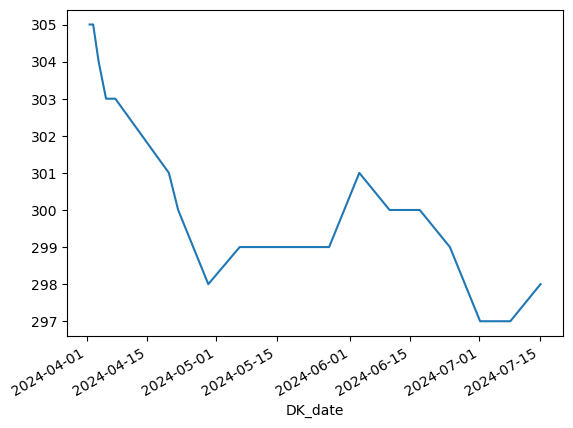

In [208]:
vyvoj2[vyvoj2['DK_titul'] == 'Josefíně všichni lžou']['DK_Chystám_se_číst'].plot()

<Axes: xlabel='DK_date'>

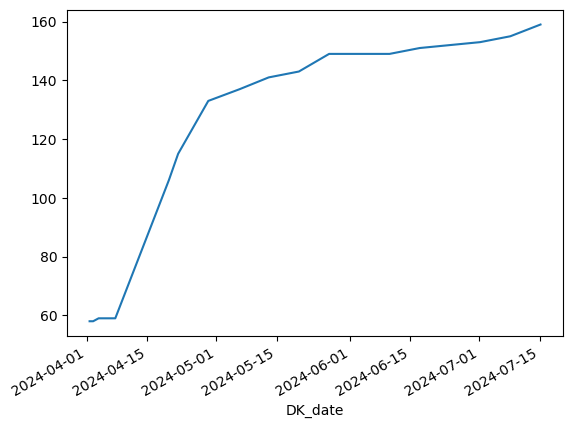

In [209]:
vyvoj2[vyvoj2['DK_titul'] == 'Hella']['DK_Chystám_se_číst'].plot()

## Syntéza (dál už to není zajímavé)

In [210]:
import numpy as np

In [211]:
df = pd.read_json(os.path.join("data","martinus_vyslo.json"))

In [212]:
df

,M_titul,M_autorstvo,M_anotace,M_počet_stran,M_vazba,M_rozměr,M_hmotnost,M_isbn,M_rok_vydání,M_jazyk,...,M_účel_knihy,M_audiokniha,M_vydání,M_originální_název,M_překlad,M_ostatní,M_předběžné_datum_vydání,M_příloha,M_jazyková_úroveň,M_knižní_předloha
0,Jindřich Chalupecký. Texty a kontexty kritika ...,Tomáš Pospiszyl,Kritik a teoretik umění Jindřich Chalupecký (1...,396.0,brožovaná vazba,150×220 mm,513 g,9788088366478,2023,čeština,...,None,None,None,None,None,None,NaN,None,None,None
1,Hra s formami 2,Eduardo Duran,"Vedomie je individuálne vnímanie, ktoré má kaž...",404.0,brožovaná vazba,135×205 mm,510 g,9798373986052,2023,slovenština,...,None,None,None,None,None,None,NaN,None,None,None
2,"Práce, odvody a mzdy bez chyb, pokut a penále ...",None,Firemní školky jako benefit - Někteří zaměstna...,NaN,brožovaná vazba,None,None,9771801993457,2024,čeština,...,None,None,None,None,None,None,NaN,None,None,None
3,Daně v podnikání,Alena Vančurová Hana Zídková,"Publikace vychází již podruhé, v aktualizované...",368.0,brožovaná vazba,155×235 mm,544 g,9788076763593,2022,čeština,...,None,None,None,None,None,None,NaN,None,None,None
4,Budoucnost začíná teď,Lukáš Bujna,Během pandemie covidu si husitský farář a básn...,248.0,brožovaná vazba,150×210 mm,None,9788090788145,2023,čeština,...,None,None,None,None,None,None,NaN,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11709,V severnom vetre čítaš správy ďaleké,Martin Odler,Kniha V severnom vetre čítaš správy ďaleké je ...,208.0,pevná vazba,154×226 mm,490 g,9788082450296,2023,slovenština,...,None,None,None,None,None,None,NaN,None,None,None
11710,Louka a spousta tance,Jakub Klikar,"Tato básnická sbírka obsahující třicet básní, ...",40.0,brožovaná vazba,140×210 mm,76 g,9788075682079,2020,čeština,...,None,None,None,None,None,None,NaN,None,None,None
11711,Z čeho je den,Dominika Prejdová,Román Dominiky Prejdové popisuje dynamiku a mi...,264.0,pevná vazba,135×208 mm,40 g,9788024275772,2021,čeština,...,None,None,None,None,None,None,NaN,None,None,None
11712,Krvavý Žižkov\n Novinka,Martin Reiner,"Krvavý Žižkov je antologie, která má svého pře...",256.0,pevná vazba,150×210 mm,None,9788072279012,2024,čeština,...,None,None,None,None,None,None,NaN,None,None,None


In [213]:
df['isbn'] = df['M_isbn'].astype(str)

In [214]:
dk['isbn'] = dk['DK_isbn'].astype(str).apply(lambda x: x.replace(".0",""))

In [215]:
gr['isbn'] = gr['GR_isbn'].apply(lambda x: int(x)).astype(str)

In [216]:
dk['isbn']

0        9788027904853
1        9788020615770
2        9788072444748
3        9788076374591
4        9788024289472
             ...      
23331    9788025363850
23332    9788072278879
23333    9788024288826
23334    9788027721405
23335    9788025741528
Name: isbn, Length: 23336, dtype: object

In [217]:
dkm = dk.merge(df, on="isbn", how="inner")

In [218]:
dkm

,DK_isbn,DK_date,DK_titul,DK_tags,DK_Knihotéce,DK_Chystám_se_číst,DK_Chci_si_koupit,DK_rating,DK_ratings_count,DK_Přečtených,...,M_účel_knihy,M_audiokniha,M_vydání,M_originální_název,M_překlad,M_ostatní,M_předběžné_datum_vydání,M_příloha,M_jazyková_úroveň,M_knižní_předloha
0,9.788028e+12,2024-04-01 14:39:23,Boží potměšilost,['české romány'],46.0,29.0,6.0,78.0,18.0,19.0,...,None,None,None,None,None,None,NaN,None,None,None
1,9.788021e+12,2024-04-01 14:39:24,Oprátka za osm mrtvých,"['ženy', 'psychiatrické léčebny', 'Českosloven...",150.0,210.0,60.0,88.0,301.0,400.0,...,None,od 398 Kč,None,None,None,None,NaN,None,None,None
2,9.788072e+12,2024-04-01 14:39:25,Golem,"['golem', 'Rabi Löw']",28.0,18.0,3.0,82.0,26.0,34.0,...,None,None,None,None,None,None,NaN,None,None,None
3,9.788076e+12,2024-04-01 14:39:26,Proč všichni odcházejí,['autobiografické prvky'],13.0,170.0,45.0,91.0,50.0,59.0,...,None,None,None,None,None,None,NaN,None,None,None
4,9.788024e+12,2024-04-01 14:39:27,Sochař,[],46.0,23.0,7.0,81.0,19.0,28.0,...,None,None,None,None,None,None,NaN,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23494,9.788025e+12,2024-07-15 03:40:42,Trnitá kletba,"['Literatura česká', 'Fantasy', 'Pro děti a ml...",89.0,105.0,26.0,83.0,79.0,90.0,...,None,None,None,None,None,None,NaN,None,None,None
23495,9.788072e+12,2024-07-15 03:40:42,Zuta a svlečena,"['Literatura česká', 'Poezie']",1.0,8.0,1.0,80.0,5.0,5.0,...,None,None,None,None,None,None,NaN,None,None,None
23496,9.788024e+12,2024-07-15 03:40:43,Ve škole i za školou,"['Povídky', 'Literatura česká']",39.0,23.0,6.0,78.0,49.0,64.0,...,None,299 Kč,None,None,None,None,NaN,None,None,None
23497,9.788028e+12,2024-07-15 03:40:43,V hrůze a krvi zrozeni,"['Horory', 'Povídky', 'Literatura česká', 'hor...",64.0,38.0,16.0,69.0,53.0,53.0,...,None,None,None,None,None,None,NaN,None,None,None


In [219]:
dkm = dkm.merge(gr, on="isbn", how="inner")

In [220]:
dkm

,DK_isbn,DK_date,DK_titul,DK_tags,DK_Knihotéce,DK_Chystám_se_číst,DK_Chci_si_koupit,DK_rating,DK_ratings_count,DK_Přečtených,...,M_jazyková_úroveň,M_knižní_předloha,GR_isbn,GR_date,GR_title,GR_rating,GR_ratings_count,GR_reviews,GR_published,autorstvo
0,9.788028e+12,2024-04-01 14:39:23,Boží potměšilost,['české romány'],46.0,29.0,6.0,78.0,18.0,19.0,...,None,None,9.788028e+12,2024-04-29 02:00:07,Boží potměšilost by Zdeněk Řehák,2.0,1.0,0.0,"January 1, 2023",Zdeněk Řehák
1,9.788028e+12,2024-04-01 14:39:23,Boží potměšilost,['české romány'],46.0,29.0,6.0,78.0,18.0,19.0,...,None,None,9.788028e+12,2024-05-06 10:59:41,Boží potměšilost by Zdeněk Řehák,2.0,1.0,0.0,"January 1, 2023",Zdeněk Řehák
2,9.788028e+12,2024-04-01 14:39:23,Boží potměšilost,['české romány'],46.0,29.0,6.0,78.0,18.0,19.0,...,None,None,9.788028e+12,2024-05-13 03:01:26,Boží potměšilost by Zdeněk Řehák,2.0,1.0,0.0,"January 1, 2023",Zdeněk Řehák
3,9.788028e+12,2024-04-01 14:39:23,Boží potměšilost,['české romány'],46.0,29.0,6.0,78.0,18.0,19.0,...,None,None,9.788028e+12,2024-05-20 02:52:16,Boží potměšilost by Zdeněk Řehák,2.0,1.0,0.0,"January 1, 2023",Zdeněk Řehák
4,9.788028e+12,2024-04-01 14:39:23,Boží potměšilost,['české romány'],46.0,29.0,6.0,78.0,18.0,19.0,...,None,None,9.788028e+12,2024-05-27 03:05:47,Boží potměšilost by Zdeněk Řehák,2.0,1.0,0.0,"January 1, 2023",Zdeněk Řehák
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267665,9.788026e+12,2024-07-15 03:40:43,Pod Kaštanem,"['Romány', 'Pro ženy', 'Literatura česká']",69.0,54.0,7.0,78.0,50.0,62.0,...,None,None,9.788026e+12,2024-07-29 03:17:23,Pod Kaštanem by Barbora Majchráková,3.0,6.0,2.0,"June 15, 2023",Barbora Majchráková
267666,9.788026e+12,2024-07-15 03:40:43,Pod Kaštanem,"['Romány', 'Pro ženy', 'Literatura česká']",69.0,54.0,7.0,78.0,50.0,62.0,...,None,None,9.788026e+12,2024-08-12 03:40:30,Pod Kaštanem by Barbora Majchráková,3.0,6.0,2.0,"June 15, 2023",Barbora Majchráková
267667,9.788026e+12,2024-07-15 03:40:43,Pod Kaštanem,"['Romány', 'Pro ženy', 'Literatura česká']",69.0,54.0,7.0,78.0,50.0,62.0,...,None,None,9.788026e+12,2024-08-19 03:45:57,Pod Kaštanem by Barbora Majchráková,3.0,6.0,2.0,"June 15, 2023",Barbora Majchráková
267668,9.788026e+12,2024-07-15 03:40:43,Pod Kaštanem,"['Romány', 'Pro ženy', 'Literatura česká']",69.0,54.0,7.0,78.0,50.0,62.0,...,None,None,9.788026e+12,2024-08-26 03:33:58,Pod Kaštanem by Barbora Majchráková,3.0,6.0,2.0,"June 15, 2023",Barbora Majchráková


In [221]:
dkm.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_tags', 'DK_Knihotéce',
       'DK_Chystám_se_číst', 'DK_Chci_si_koupit', 'DK_rating',
       'DK_ratings_count', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_dalších_seznamech', 'DK_Právě_čtených', 'DK_Doporučených', 'isbn',
       'skore', 'hezky_titul', 'nakladatel', 'M_titul', 'M_autorstvo',
       'M_anotace', 'M_počet_stran', 'M_vazba', 'M_rozměr', 'M_hmotnost',
       'M_isbn', 'M_rok_vydání', 'M_jazyk', 'M_původ', 'M_nakladatel',
       'M_kategorizace', 'M_cena', 'M_datum', 'M_série', 'M_díl', 'M_edice',
       'M_pro_koho', 'M_e-kniha', 'M_přečtená', 'M_věkové_doporučení',
       'M_styl', 'M_ilustrace', 'M_účel_knihy', 'M_audiokniha', 'M_vydání',
       'M_originální_název', 'M_překlad', 'M_ostatní',
       'M_předběžné_datum_vydání', 'M_příloha', 'M_jazyková_úroveň',
       'M_knižní_předloha', 'GR_isbn', 'GR_date', 'GR_title', 'GR_rating',
       'GR_ratings_count', 'GR_reviews', 'GR_published', 'autorstvo'],
      dtype='ob

In [222]:
import seaborn as sns

In [223]:
merged = pd.DataFrame(dkm[(dkm['DK_ratings_count'] > 10) & (dkm['GR_ratings_count'] > 5)].groupby(['isbn','M_počet_stran'])[['DK_Chystám_se_číst','DK_rating','DK_ratings_count','DK_Přečtených','GR_rating','GR_ratings_count']].max()).reset_index()

In [224]:
merged[['isbn','DK_ratings_count','GR_ratings_count']]

,isbn,DK_ratings_count,GR_ratings_count
0,9788011027667,19.0,7.0
1,9788011032210,29.0,6.0
2,9788011033620,14.0,9.0
3,9788011034887,179.0,111.0
4,9788011035594,101.0,180.0
...,...,...,...
267,9788090837690,95.0,159.0
268,9788090871250,31.0,87.0
269,9788090875968,85.0,24.0
270,9788090890602,199.0,379.0


In [225]:
merged.to_csv(os.path.join('../one-off-jupyters','trenovaci.csv'), index=False)

In [226]:
merged

,isbn,M_počet_stran,DK_Chystám_se_číst,DK_rating,DK_ratings_count,DK_Přečtených,GR_rating,GR_ratings_count
0,9788011027667,208.0,36.0,91.0,19.0,26.0,4.33,7.0
1,9788011032210,156.0,29.0,98.0,29.0,44.0,4.17,6.0
2,9788011033620,352.0,11.0,100.0,14.0,17.0,4.13,9.0
3,9788011034887,400.0,97.0,87.0,179.0,204.0,4.19,111.0
4,9788011035594,248.0,126.0,88.0,101.0,156.0,4.24,180.0
...,...,...,...,...,...,...,...,...
267,9788090837690,256.0,46.0,80.0,95.0,103.0,3.86,159.0
268,9788090871250,219.0,27.0,92.0,31.0,37.0,4.39,87.0
269,9788090875968,411.0,39.0,83.0,85.0,132.0,4.14,24.0
270,9788090890602,336.0,173.0,90.0,199.0,226.0,4.51,379.0


<Axes: ylabel='Density'>

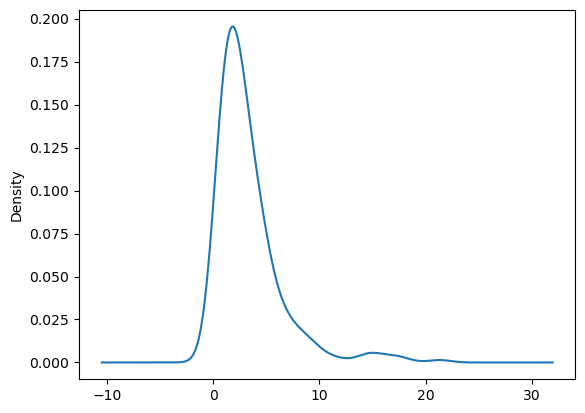

In [227]:
pd.Series(merged.groupby('isbn')['DK_ratings_count'].max() / merged.groupby('isbn')['GR_ratings_count'].max()).plot.density()

In [228]:
pd.Series(merged.groupby('isbn')['DK_ratings_count'].max() / merged.groupby('isbn')['GR_ratings_count'].max()).nlargest()

isbn
9788027910014    21.333333
9788027912841    18.000000
9788024951249    16.833333
9788027910182    16.700000
9788024950143    15.000000
dtype: float64

In [229]:
pd.Series(merged.groupby('isbn')['DK_ratings_count'].max() / merged.groupby('isbn')['GR_ratings_count'].max()).nsmallest()

isbn
9788088433262    0.116788
9788011037154    0.225225
9788027720613    0.245614
9788090819269    0.256098
9788088494065    0.259542
dtype: float64

C:\tools\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


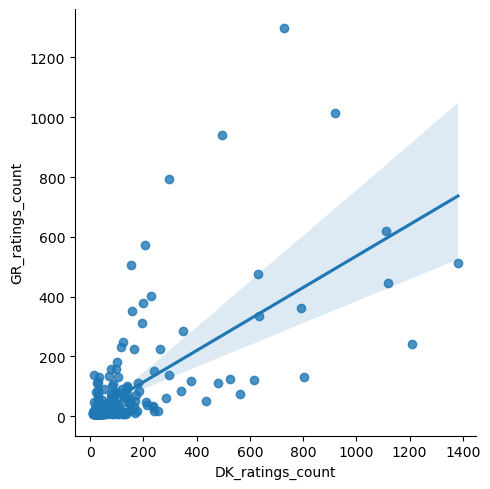

In [230]:
sns.lmplot(x='DK_ratings_count', y='GR_ratings_count', data=merged)

C:\tools\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


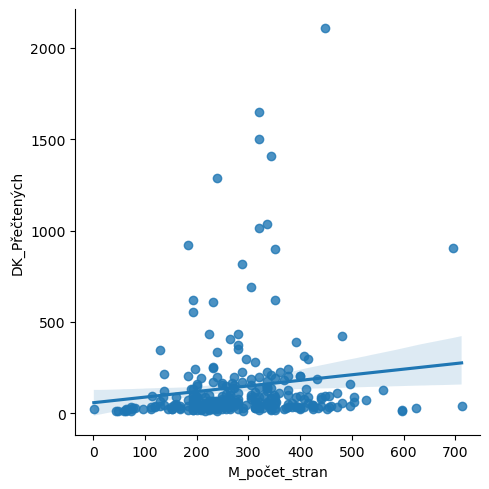

In [231]:
sns.lmplot(x='M_počet_stran', y='DK_Přečtených', data=merged)

C:\tools\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


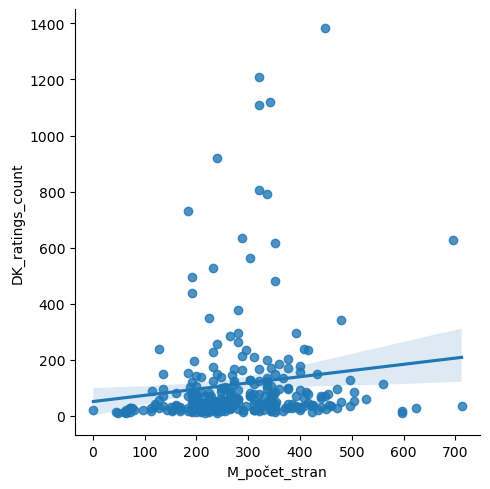

In [232]:
sns.lmplot(x='M_počet_stran', y='DK_ratings_count', data=merged)

C:\tools\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


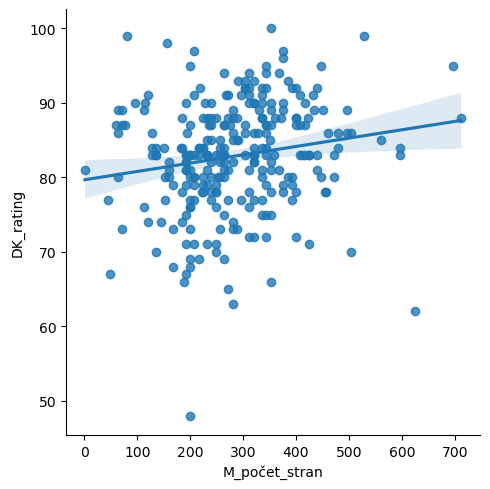

In [233]:
sns.lmplot(x='M_počet_stran', y='DK_rating', data=merged)

C:\tools\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


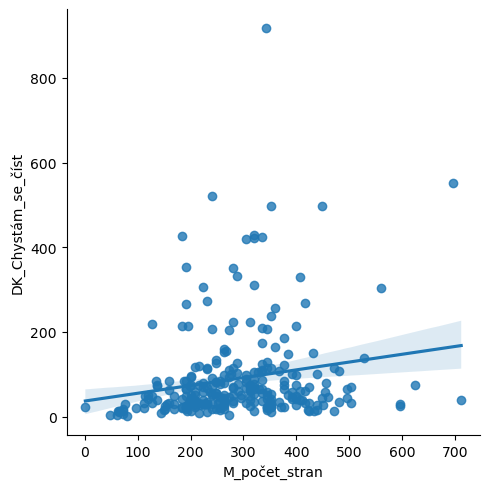

In [234]:
sns.lmplot(x='M_počet_stran', y='DK_Chystám_se_číst', data=merged)

## Co se líbí

In [235]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_tags', 'DK_Knihotéce',
       'DK_Chystám_se_číst', 'DK_Chci_si_koupit', 'DK_rating',
       'DK_ratings_count', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_dalších_seznamech', 'DK_Právě_čtených', 'DK_Doporučených', 'isbn',
       'skore', 'hezky_titul', 'nakladatel'],
      dtype='object')

In [236]:
tagy = dk.copy()
tagy['DK_tags'] = tagy['DK_tags'].apply(lambda x: x.replace(f"""[""",'').replace(f"""]""",'').replace(f"""'""","").split(', '))
tagy = tagy.explode('DK_tags')
tagy['DK_tags'] = tagy['DK_tags'].apply(lambda x: x.lower())
tagy = tagy[['DK_date','DK_titul','DK_ratings_count','DK_rating','DK_tags']]
tagy = tagy[tagy['DK_date'] > week_ago]

In [237]:
tagy

,DK_date,DK_titul,DK_ratings_count,DK_rating,DK_tags


In [238]:
romany = tagy[tagy['DK_tags'].str.contains('román',na=False)]['DK_titul'].drop_duplicates().to_list()

In [239]:
tagy['DK_tags'].nunique()

0

In [240]:
dk.sample

<bound method NDFrame.sample of             DK_isbn              DK_date                DK_titul  \
0      9.788028e+12  2024-04-01 14:39:23        Boží potměšilost   
1      9.788021e+12  2024-04-01 14:39:24  Oprátka za osm mrtvých   
2      9.788072e+12  2024-04-01 14:39:25                   Golem   
3      9.788076e+12  2024-04-01 14:39:26  Proč všichni odcházejí   
4      9.788024e+12  2024-04-01 14:39:27                  Sochař   
...             ...                  ...                     ...   
23331  9.788025e+12  2024-07-15 03:40:42           Trnitá kletba   
23332  9.788072e+12  2024-07-15 03:40:42         Zuta a svlečena   
23333  9.788024e+12  2024-07-15 03:40:43    Ve škole i za školou   
23334  9.788028e+12  2024-07-15 03:40:43  V hrůze a krvi zrozeni   
23335  9.788026e+12  2024-07-15 03:40:43            Pod Kaštanem   

                                                 DK_tags  DK_Knihotéce  \
0                                       ['české romány']          46.0   
1  

In [241]:
nejcastejsi_tagy = tagy.groupby('DK_tags').size()
nejcastejsi_tagy = nejcastejsi_tagy[nejcastejsi_tagy >= 10]
nejcastejsi_tagy = nejcastejsi_tagy.index.to_list()
len(nejcastejsi_tagy)

0

In [242]:
nejcastejsi_tagy

[]

In [243]:
zebricek = tagy[(tagy['DK_tags'].isin(nejcastejsi_tagy)) & (tagy['DK_titul'].isin(romany))].groupby('DK_tags')['DK_rating'].mean().sort_values(ascending=False)

In [244]:
zebricek.head(20)

Series([], Name: DK_rating, dtype: float64)

In [245]:
zebricek.tail(20)

Series([], Name: DK_rating, dtype: float64)

In [246]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_tags', 'DK_Knihotéce',
       'DK_Chystám_se_číst', 'DK_Chci_si_koupit', 'DK_rating',
       'DK_ratings_count', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_dalších_seznamech', 'DK_Právě_čtených', 'DK_Doporučených', 'isbn',
       'skore', 'hezky_titul', 'nakladatel'],
      dtype='object')

In [247]:
dk['DK_date'] = pd.to_datetime(dk['DK_date'])

In [248]:
dk[dk['DK_titul'] == 'Rozložíš paměť']

,DK_isbn,DK_date,DK_titul,DK_tags,DK_Knihotéce,DK_Chystám_se_číst,DK_Chci_si_koupit,DK_rating,DK_ratings_count,DK_Přečtených,DK_Čtenářské_výzvě,DK_dalších_seznamech,DK_Právě_čtených,DK_Doporučených,isbn,skore,hezky_titul,nakladatel
271,9.788076e+12,2024-04-01 14:46:30,Rozložíš paměť,"['homosexualita', 'česká literatura', 'dospívá...",47.0,237.0,67.0,84.0,113.0,138.0,25.0,4.0,10.0,10.0,9788076373990,375.0,Marek Torčík: Rozložíš paměť,Paseka
1383,9.788076e+12,2024-04-02 10:29:20,Rozložíš paměť,"['homosexualita', 'česká literatura', 'dospívá...",47.0,238.0,67.0,84.0,113.0,138.0,25.0,4.0,10.0,10.0,9788076373990,376.0,Marek Torčík: Rozložíš paměť,Paseka
2499,9.788076e+12,2024-04-03 16:59:08,Rozložíš paměť,"['homosexualita', 'česká literatura', 'dospívá...",47.0,238.0,67.0,84.0,113.0,138.0,25.0,4.0,10.0,10.0,9788076373990,376.0,Marek Torčík: Rozložíš paměť,Paseka
3617,9.788076e+12,2024-04-05 10:10:41,Rozložíš paměť,"['homosexualita', 'česká literatura', 'dospívá...",47.0,240.0,67.0,84.0,114.0,139.0,25.0,4.0,10.0,10.0,9788076373990,379.0,Marek Torčík: Rozložíš paměť,Paseka
4732,9.788076e+12,2024-04-07 13:44:59,Rozložíš paměť,"['homosexualita', 'česká literatura', 'dospívá...",47.0,242.0,67.0,84.0,115.0,140.0,26.0,4.0,12.0,10.0,9788076373990,382.0,Marek Torčík: Rozložíš paměť,Paseka
5854,9.788076e+12,2024-04-19 23:46:17,Rozložíš paměť,"['homosexualita', 'česká literatura', 'dospívá...",54.0,285.0,72.0,85.0,128.0,154.0,29.0,5.0,15.0,12.0,9788076373990,439.0,Marek Torčík: Rozložíš paměť,Paseka
7011,9.788076e+12,2024-04-22 03:28:44,Rozložíš paměť,"['homosexualita', 'česká literatura', 'dospívá...",55.0,293.0,74.0,85.0,130.0,158.0,29.0,5.0,13.0,12.0,9788076373990,451.0,Marek Torčík: Rozložíš paměť,Paseka
8172,9.788076e+12,2024-04-29 03:10:14,Rozložíš paměť,"['Romány', 'Literatura česká', 'homosexualita'...",62.0,311.0,80.0,85.0,135.0,166.0,30.0,5.0,28.0,14.0,9788076373990,477.0,Marek Torčík: Rozložíš paměť,Paseka
9616,9.788076e+12,2024-05-06 09:57:18,Rozložíš paměť,"['Romány', 'Literatura česká', 'homosexualita'...",64.0,310.0,80.0,85.0,146.0,184.0,33.0,5.0,49.0,14.0,9788076373990,494.0,Marek Torčík: Rozložíš paměť,Paseka
10830,9.788076e+12,2024-05-13 03:17:54,Rozložíš paměť,"['Romány', 'Literatura česká', 'homosexualita'...",76.0,313.0,79.0,86.0,189.0,240.0,40.0,5.0,34.0,17.0,9788076373990,553.0,Marek Torčík: Rozložíš paměť,Paseka


In [249]:
dk.groupby(["DK_titul",pd.Grouper(freq="W",key="DK_date")])['DK_rating'].mean()

DK_titul                     DK_date   
(NE)uvěřitelný život Oty K.  2024-04-07    60.0
                             2024-04-21    60.0
                             2024-04-28    60.0
                             2024-05-05    60.0
                             2024-05-12    60.0
                                           ... 
…a přeskočila jiskra         2024-06-23    80.0
                             2024-06-30    80.0
                             2024-07-07    80.0
                             2024-07-14    40.0
                             2024-07-21    50.0
Name: DK_rating, Length: 18867, dtype: float64

## Novinky

In [250]:
gr.groupby("GR_title")['GR_date'].min().sort_values(ascending=False).head(50)

GR_title
…a přeskočila jiskra by Halina Pawlowská                                   2024-09-02 03:53:54
Mediátorka: Každý má svou pravdu by Hana Lenghartová                       2024-09-02 03:45:45
Mezera mezi zdí a parketama, část první by Jaromír František Fumas Palme   2024-09-02 03:31:56
Průvodce králičí norou by Jan Tománek                                      2024-09-02 02:57:26
Metakunsthistorie by Jakub Stejskal                                        2024-09-02 02:56:07
Prý musím projít březovým lesem by Štěpánka Borská                         2024-08-26 03:20:29
Exploring the Benefits of Nature on Mental Health by Oheta Sophia          2024-08-26 02:55:46
Endometrióza v otázkách a odpovědích by Jan Drahoňovský                    2024-08-26 02:38:30
Zeptej se vědce: Neexistují blbé otázky by Aleš Dvořák                     2024-08-26 02:20:04
Past na ženicha (Nevěsta na útěku, #2) by Alexander Stainforth             2024-08-19 03:29:42
Řeč mrtvejch / Erzherz / Nebožky by Radek

In [251]:
dk.groupby("DK_titul")['DK_date'].min().sort_values(ascending=False).head(50)

DK_titul
Šplouchá na maják                                                                            2024-07-15 03:39:15
Vynucených 7 dní                                                                             2024-07-15 03:38:45
Stačí mávnout křídly                                                                         2024-07-15 03:38:25
Dočkej času jako Husák listopadu: Únor rudý, národ chudý                                     2024-07-15 03:37:48
Řeka ztracených duší                                                                         2024-07-15 03:37:43
Smrt na chrudimském hradě                                                                    2024-07-15 03:36:01
Naše země na rozcestí                                                                        2024-07-15 03:34:55
Jak být fotbalistou... a nezbláznit se                                                       2024-07-15 03:34:29
Jiří Bartoška                                                                          

In [252]:
dk['nakladatel'] = dk['isbn'].apply(lambda x: nakladatelstvi(x))
pribytek = pd.DataFrame(dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].max() - dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min()).groupby('nakladatel').sum().reset_index().sum().iloc[1]
nakladatelstvo = pd.DataFrame(dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].max() - dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min()).groupby('nakladatel').sum().reset_index()
nakladatelstvo['podil'] = nakladatelstvo['skore'] / pribytek
nakladatelstvo = nakladatelstvo[nakladatelstvo['podil'] >= 0.005]
nakladatelstvo['podil'] = nakladatelstvo['podil'].apply(lambda x: f"""{round(x * 100, 1)}&nbsp;%""".replace(".", ","))
nakladatelstvo = nakladatelstvo.sort_values(by='skore',ascending=False)
nakladatelstvo = nakladatelstvo.drop(columns=['skore'])

In [253]:
nakladatelstvo

,nakladatel,podil


In [254]:
dk[(dk['DK_date'] > month_ago) & (dk['nakladatel'] == 'Paseka')]

,DK_isbn,DK_date,DK_titul,DK_tags,DK_Knihotéce,DK_Chystám_se_číst,DK_Chci_si_koupit,DK_rating,DK_ratings_count,DK_Přečtených,DK_Čtenářské_výzvě,DK_dalších_seznamech,DK_Právě_čtených,DK_Doporučených,isbn,skore,hezky_titul,nakladatel


In [255]:
str(datetime.datetime.now())

'2024-09-06 12:36:02.288908'

In [256]:
def koho_vydavaji(nakl):
    global dk
    top = pd.DataFrame(dk[(dk['DK_date'] > month_ago) & (dk['nakladatel'] == nakl)].groupby('hezky_titul')['skore'].max() - dk[(dk['DK_date'] > month_ago) & (dk['nakladatel'] == nakl)].groupby('hezky_titul')['skore'].min()).groupby('hezky_titul').sum().reset_index()
    print(top)
    top = top.groupby('hezky_titul')['skore'].max().nlargest(3).index.to_list()
    print(top)
    top2 = [x.split(":")[0] for x in top if "[" not in x]
    top2 = list(set(top2))
    kolik = len(top2)
    if kolik > 3:
        return top2[:3]
    else:
        return top2

In [257]:
print(koho_vydavaji('Paseka'))

Empty DataFrame
Columns: [hezky_titul, skore]
Index: []
[]
[]
